<a href="https://colab.research.google.com/github/Harshit109C/APS-LAB/blob/main/Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Divide and Conquer (Sorting)

- **Created by Dr. Ajay

Write a python program to perform **Countingsort**.
* Statement:  Given a disordered list of repeated integers, rearrange the integers in natural order.
 Sample Input: [4,3,2,1,4,3,2,4,3,4]
 Sample Output: [1,2,2,3,3,3,4,4,4,4]

Time Complexity of Solution: Best Case O(n+k); Average Case O(n+k); Worst Case O(n+k), where n is the size of the input array and k means the values range from 0 to k.
- Approach:
Counting sort, like radix sort and bucket sort, is an integer based algorithm (i.e. the values of the input array are assumed to be integers). Hence counting sort is among the fastest sorting algorithms around, in theory. The  particular distinction for counting sort is that it creates a bucket for each value and keep a counter in each bucket. Then each time a value is encountered in the input collection, the appropriate counter is incremented. Because counting sort creates a bucket for each value, an imposing restriction is that the maximum value in the input array be known beforehand. Bucket sort uses a hash function to distribute values; counting sort, on the other hand, creates a counter for each value -- hence the name.
- Implementation notes:
1. Since the values range from 0 to k, create k+1 buckets.

2. To fill the buckets, iterate through the input list and
each time a value appears, increment the counter in its bucket.
3. Now fill the input list with the compressed data in the
buckets. Each bucket's key represents a value in the  array. So for each bucket, from smallest key to largest, add the index of the bucket to the input array and decrease the counter in said bucket by one; until the counter is zero.

Sample Input: [4, 3, 2, 1, 4, 3, 2, 4, 3, 4]
Sample Output: [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]

Time taken to sort 2000 elements (max value 500): 0.4766 ms

Generating performance plot...


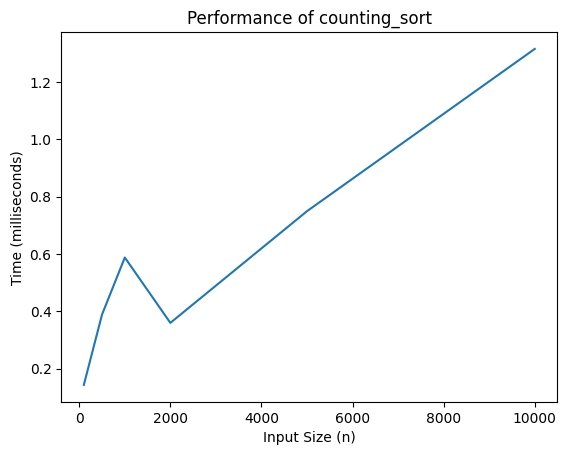

In [25]:
import time
import matplotlib.pyplot as plt
import random

def counting_sort(arr):
    if not arr:
        return []
    max_val = max(arr)
    count = [0] * (max_val + 1)
    for num in arr:
        count[num] += 1


    sorted_arr = []
    for i in range(max_val + 1):
        while count[i] > 0:
            sorted_arr.append(i)
            count[i] -= 1
    return sorted_arr


def measure_time(func, arr):
    start_time = time.time()
    func(arr)
    end_time = time.time()
    return (end_time - start_time) * 1000

def plot_performance(sort_func, max_k_value_for_random=1000):
    input_sizes = [100, 500, 1000, 2000, 5000, 10000]
    times = []

    for size in input_sizes:

        arr = [random.randint(0, max_k_value_for_random) for _ in range(size)]
        times.append(measure_time(sort_func, arr))


    plt.plot( input_sizes,times)
    plt.title(f'Performance of {sort_func.__name__}')
    plt.xlabel('Input Size (n)')
    plt.ylabel('Time (milliseconds)')

    plt.show()


sample_input = [4,3,2,1,4,3,2,4,3,4]
sample_output = counting_sort(sample_input)
print(f"Sample Input: {sample_input}")
print(f"Sample Output: {sample_output}")


random_array_for_time = [random.randint(0, 500) for _ in range(2000)]
time_taken = measure_time(counting_sort, random_array_for_time)
print(f"\nTime taken to sort 2000 elements (max value 500): {time_taken:.4f} ms")
print("\nGenerating performance plot...")
plot_performance(counting_sort, max_k_value_for_random=2000)


 - *Bucketsort*
Statement:
Given a disordered list of integers, rearrange them in natural order.
 Sample Input: [8,5,3,1,9,6,0,7,4,2,5]
 Sample Output: [0,1,2,3,4,5,6,7,8,9,5]
Time Complexity of Solution:
Best Case O(n); Average Case O(n); Worst Case O(n).
- Approach:
If it sounds too good to be true, then most likely it's not true. Bucketsort is not an exception to this adage. For bucketsort to
work at its blazing efficiency, there are multiple prerequisites.
First the hash function that is used to partition the elements need
to be very good and must produce ordered hash: if i < k then
hash(i) < hash(k). Second, the elements to be sorted must be
uniformly distributed.
  The aforementioned aside, bucket sort is actually very good
considering that counting sort is reasonably speaking its upper
bound. And counting sort is very fast. The particular distinction
for bucket sort is that it uses a hash function to partition the
keys of the input array, so that multiple keys may hash to the same
bucket. Hence each bucket must effectively be a growable list;
similar to radix sort.


Sample Input for Bucket Sort: [8, 5, 3, 1, 9, 6, 0, 7, 4, 2, 5]
Sample Output for Bucket Sort: [0, 1, 2, 3, 4, 5, 5, 6, 7, 8, 9]

Time taken to sort 5000 elements (max value 1000) using Bucket Sort: 3.6271 ms

Generating performance plot for Bucket Sort...


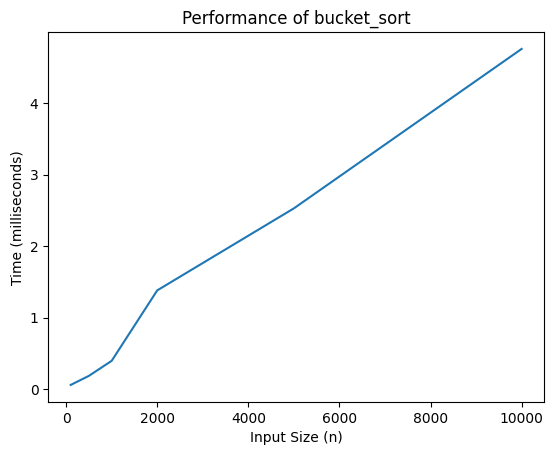

In [33]:
#write code for above cell and compute the running time and also plot graph.
def bucket_sort(arr):
    if not arr:
        return []

    min_val = min(arr)
    max_val = max(arr)

    if len(arr) == 0:
        num_buckets = 1
    else:

        bucket_range = (max_val - min_val) / len(arr) if len(arr) > 0 else 1
        num_buckets = int(len(arr) * 0.5) + 1 if len(arr) > 0 else 1
    buckets = [[] for _ in range(num_buckets)]

    for num in arr:

        if max_val == min_val:
            bucket_index = 0
        else:
            bucket_index = int((num - min_val) / (max_val - min_val) * (num_buckets - 1))
        buckets[bucket_index].append(num)

    sorted_arr = []
    for bucket in buckets:

        bucket.sort()
        sorted_arr.extend(bucket)

    return sorted_arr

sample_input_bucket = [8,5,3,1,9,6,0,7,4,2,5]
sample_output_bucket = bucket_sort(sample_input_bucket)
print(f"Sample Input for Bucket Sort: {sample_input_bucket}")
print(f"Sample Output for Bucket Sort: {sample_output_bucket}")

random_array_for_time_bucket = [random.randint(0, 1000) for _ in range(5000)]
time_taken_bucket = measure_time(bucket_sort, random_array_for_time_bucket)
print(f"\nTime taken to sort 5000 elements (max value 1000) using Bucket Sort: {time_taken_bucket:.4f} ms")

print("\nGenerating performance plot for Bucket Sort...")
plot_performance(bucket_sort, max_k_value_for_random=5000)

**Radix sort**
Statement:Given a disordered list of integers, rearrange them in natural order.
Sample Input: [18,5,100,3,1,19,6,0,7,4,2]
Sample Output: [0,1,2,3,4,5,6,7,18,19,100]
Time Complexity of Solution:Best Case O(kn); Average Case O(kn); Worst Case O(kn),where k is the length of the longest number and n is the size of the input array.Note: if k is greater than log(n) then an nlog(n) algorithm would be a better fit. In reality we can always change the radix to make k less than log(n).
- Approach: radix sort, like counting sort and bucket sort, is an integer based algorithm (i.e. the values of the input array are assumed to be integers). Hence radix sort is among the fastest sorting algorithms around, in theory. The particular distinction for radix sort is that it creates a bucket for each cipher (i.e. digit); as such, similar to bucket sort, each bucket in radix sort must be a
growable list that may admit different keys. For decimal values, the number of buckets is 10, as the decimal system has 10 numerals/cyphers (i.e. 0,1,2,3,4,5,6,7,8,9). Then the keys are continuously sorted by significant digits.

Sample Input for Radix Sort: [18, 5, 100, 3, 1, 19, 6, 0, 7, 4, 2]
Sample Output for Radix Sort: [0, 1, 2, 3, 4, 5, 6, 7, 18, 19, 100]

Time taken to sort 10000 elements (max value 100000) using Radix Sort: 28.0266 ms

Generating performance plot for Radix Sort...


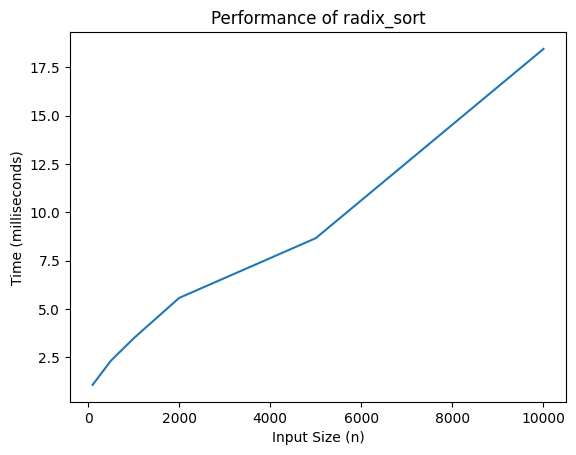

In [36]:
#write code for above cell and compute the running time and also plot graph.
def radix_sort(arr):
    if not arr:
        return []

    max_val = max(arr)


    exp = 1
    while max_val // exp > 0:

        output = [0] * len(arr)
        count = [0] * 10

        for i in range(len(arr)):
            index = (arr[i] // exp) % 10
            count[index] += 1


        for i in range(1, 10):
            count[i] += count[i - 1]

        i = len(arr) - 1
        while i >= 0:
            index = (arr[i] // exp) % 10
            output[count[index] - 1] = arr[i]
            count[index] -= 1
            i -= 1


        for i in range(len(arr)):
            arr[i] = output[i]

        exp *= 10
    return arr


sample_input_radix = [18,5,100,3,1,19,6,0,7,4,2]
sample_output_radix = radix_sort(list(sample_input_radix))
print(f"Sample Input for Radix Sort: {sample_input_radix}")
print(f"Sample Output for Radix Sort: {sample_output_radix}")

random_array_for_time_radix = [random.randint(0, 100000) for _ in range(10000)]
time_taken_radix = measure_time(radix_sort, random_array_for_time_radix)
print(f"\nTime taken to sort 10000 elements (max value 100000) using Radix Sort: {time_taken_radix:.4f} ms")


print("\nGenerating performance plot for Radix Sort...")
plot_performance(radix_sort, max_k_value_for_random=100000)
